Random file chosen: C:/Users/genev/projet-prog/AAFC\MSBNK-AAFC-AC000082.txt
Chemical formula : C32H36N2O5 
Molecular weight : 528.26243
Spectral data: [[107.0855, 710433.375, 56.0], [109.0648, 1687748.5, 134.0], [130.0651, 12424489.0, 999.0], [132.0808, 1381811.25, 110.0], [135.0804, 433389.0, 33.0], [163.0754, 742976.0, 58.0], [181.0859, 440944.28125, 34.0], [185.0709, 2633474.75, 210.0], [200.107, 753127.75, 59.0], [329.1622, 402046.4375, 31.0], [331.1778, 617719.6875, 48.0], [347.1727, 560214.625, 44.0], [349.1884, 578134.0625, 45.0], [380.1856, 416600.21875, 32.0], [382.2013, 423293.625, 33.0], [483.2642, 713751.6875, 56.0], [493.2486, 1087213.125, 86.0], [511.2591, 2813086.0, 225.0], [529.2697, 2082235.375, 166.0]]
[107.0855, 710433.375, 56.0]


Text(0, 0.5, 'Intensity')

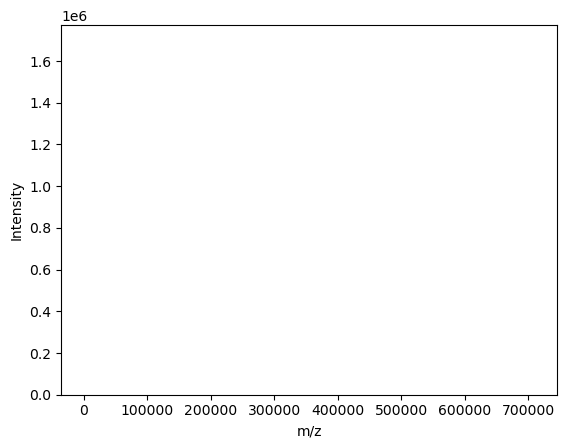

In [9]:
import os
import random
import matplotlib.pyplot as plt

def choose_random_file(folder_path):  # choose a random file in the data base
    # Get a list of all files in the folder
    files = os.listdir(folder_path)
    
    # Filter out directories (if any)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]
    
    # Choose a random file from the list
    random_file = random.choice(files)
    
    # Return the full path to the random file
    return os.path.join(folder_path, random_file)

folder_path = 'C:/Users/genev/projet-prog/AAFC'
random_file = choose_random_file(folder_path)
print("Random file chosen:", random_file)

def get_theoretical_data(file_path, marker): # return the molecular formula and molecular mass of the random molecule
    try: 
        with open(file_path, 'r') as file:
            # Flag to indicate whether the marker has been found
            marker_found = False
            
            # Read lines from the file
            for line in file:
                # Check if the marker is found in the line
                if marker in line:
                    # Extract the data after the marker
                    data = line.split(marker)[-1].strip()
                    
                    # Set the flag to True
                    marker_found = True
                    
                    # Exit the loop after finding the marker
                    break
            
            # Check if the marker was found
            if not marker_found:
                print(f"The marker '{marker}' was not found in the file.")
                return None
            
            # Read and neglect any remaining lines after the marker
            for line in file:
                # Check if the line is empty or contains only whitespace
                if not line.strip():
                    continue  # Skip empty lines
                
                # Check if the line starts with the marker
                if line.strip().startswith(marker):
                    break  # Stop reading lines after encountering the marker
            
            return data
            
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

marker1 = "CH$FORMULA"
marker2 = "CH$EXACT_MASS"
molecular_formula = get_theoretical_data(random_file, marker1)
molecular_weight = get_theoretical_data(random_file, marker2)
if molecular_formula and molecular_weight is not None:
    print(f"Chemical formula {molecular_formula} \nMolecular weight {molecular_weight}")

def extract_spectral_data(file_path, start_marker, stop_marker):
    spectra = []

    try:
        with open(file_path, 'r') as file:
            # Flag to indicate whether the start marker has been found
            start_marker_found = False
            
            # Read lines from the file
            for line in file:
                # Check if the start marker is found in the line
                if start_marker in line:
                    start_marker_found = True
                    continue  # Skip the line containing the start marker
                
                # If the start marker has been found, extract spectral data
                if start_marker_found:
                    # Check if the stop marker is found in the line
                    if stop_marker in line:
                        break  # Stop reading if the stop marker is found
                    
                    # Split the line into columns (assuming space-separated values)
                    columns = line.strip().split()
                    
                    # Convert columns to numerical values
                    spectrum = [float(column) for column in columns]
                    
                    # Add the spectrum to the list of spectra
                    spectra.append(spectrum)
                    
    except Exception as e:
        print(f"Error reading file: {e}")

    return spectra

start_marker = 'PK$PEAK'
stop_marker = '//'
spectra = extract_spectral_data(random_file, start_marker, stop_marker)
print("Spectral data:", spectra)

mz = spectra[:][0]
intensity = spectra[:][1]

print(mz)

fig, ax = plt.subplots()
ax.bar(mz, intensity, color='red')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensity')